In [22]:
import numpy as np
import pandas as pd

In [24]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# using the attribute information as the column names
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']
iris =  pd.read_csv(csv_url, names = col_names)

In [25]:
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
#explore
iris.describe(include ='all')

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [20]:
#no. of species
iris["Species"].value_counts()

0    50
1    50
2    50
Name: Class, dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode labels in column 'species'.
iris['Species']= label_encoder.fit_transform(iris['Species'])

In [40]:
iris['Species'].unique()

array([0, 1, 2])

In [41]:
features = iris.drop("Species", axis = 1)
target = iris["Species"]

In [42]:
print("Feature shape: ", features.shape)
print("Target shape: ", target.shape)

Feature shape:  (150, 4)
Target shape:  (150,)


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state=30)

In [45]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (112, 4)
y_train shape (112,)
X_test shape (38, 4)
y_test shape (38,)


In [46]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

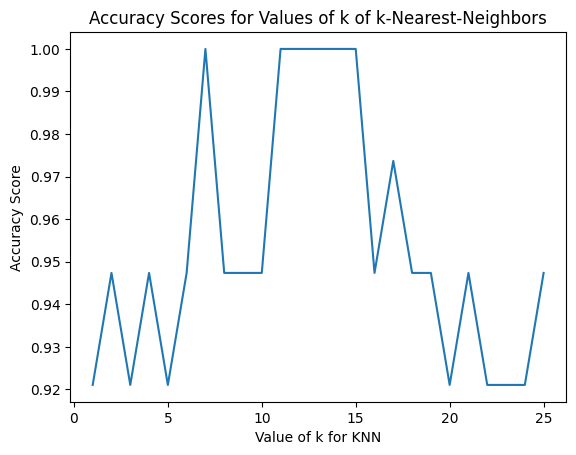

In [47]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [48]:
# selecting the value of k as 12
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(features, target)

KNeighborsClassifier(n_neighbors=12)

In [49]:
X_test

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
20,5.4,3.4,1.7,0.2
5,5.4,3.9,1.7,0.4
3,4.6,3.1,1.5,0.2
101,5.8,2.7,5.1,1.9
82,5.8,2.7,3.9,1.2
80,5.5,2.4,3.8,1.1
123,6.3,2.7,4.9,1.8
145,6.7,3.0,5.2,2.3
74,6.4,2.9,4.3,1.3
107,7.3,2.9,6.3,1.8


In [50]:
iris['Sepal_Length'].max()

7.9

In [56]:
import random
sepal_len = []
sepal_wid = []
petal_len = []
petal_wid = []
for i in range(10):
  sepal_len.append(random.uniform(iris['Sepal_Length'].min(), iris['Sepal_Length'].max()))
  sepal_wid.append(random.uniform(iris['Sepal_Width'].min(), iris['Sepal_Width'].max()))
  petal_len.append(random.uniform(iris['Petal_Length'].min(), iris['Petal_Length'].max()))
  petal_wid.append(random.uniform(iris['Petal_Width'].min(), iris['Petal_Width'].max()))

In [71]:
data = {
    "Sepal_Length" : sepal_len,
    "Sepal_Width" : sepal_wid,
    "Petal_Length" : petal_len,
    "Petal_Width" : petal_wid
}
unseen_test_set = pd.DataFrame(data)

In [72]:
unseen_test_set

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.608342,3.334598,3.710026,2.356091
1,7.605556,2.405600,2.276212,0.117944
2,4.436303,2.493703,2.124576,0.475871
3,6.601670,4.213818,3.410071,0.221280
4,5.070726,2.661715,4.553920,0.920584
5,5.876304,2.290496,5.541844,0.196874
6,4.929742,4.283095,1.635552,1.153818
7,5.402204,2.785270,5.054954,1.627322
8,4.913476,2.493140,1.874867,1.311835
9,4.683708,3.203778,5.284235,0.967705


In [73]:
unseen_data_pred = knn.predict(unseen_test_set)

In [79]:
predicted_labels = []
for val in unseen_data_pred:
  if val == 0:
    predicted_labels.append("Iris-setosa")
  elif val == 1:
    predicted_labels.append("Iris-versicolor")
  else:
    predicted_labels.append("Iris-versicolor")

In [80]:
predicted_data = unseen_test_set
predicted_data["predicted_species"] = predicted_labels

In [81]:
predicted_data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,predicted_species
0,5.608342,3.334598,3.710026,2.356091,Iris-versicolor
1,7.605556,2.405600,2.276212,0.117944,Iris-setosa
2,4.436303,2.493703,2.124576,0.475871,Iris-setosa
3,6.601670,4.213818,3.410071,0.221280,Iris-versicolor
4,5.070726,2.661715,4.553920,0.920584,Iris-versicolor
5,5.876304,2.290496,5.541844,0.196874,Iris-versicolor
6,4.929742,4.283095,1.635552,1.153818,Iris-setosa
7,5.402204,2.785270,5.054954,1.627322,Iris-versicolor
8,4.913476,2.493140,1.874867,1.311835,Iris-setosa
9,4.683708,3.203778,5.284235,0.967705,Iris-versicolor
